In [1]:
import tensorflow as tf
import numpy as np
import random
import cv2
from matplotlib import pyplot as plt

def mean_iou(y_true, y_pred):
    th = 0.5
    y_pred_ = tf.cast(y_pred > th, tf.int32)
    metric = tf.keras.metrics.MeanIoU(num_classes=2)
    score = metric(y_true, y_pred_)
    return score

alien_unet = tf.keras.models.load_model('unet_crosswalks.h5', custom_objects={'mean_iou':mean_iou})
alien_quantized_unet = tf.keras.models.load_model('al_quantizedUnet.h5', custom_objects={'mean_iou':mean_iou})
alien_quantized_unetx = tf.keras.models.load_model('al_quantizedUnetX2.h5', custom_objects={'mean_iou':mean_iou})

#common_unet = tf.keras.models.load_model('notQuantizedUnet.h5', custom_objects={'mean_iou':mean_iou})
#common_unetx = tf.keras.models.load_model('notQuantizedUnetX.h5', custom_objects={'mean_iou':mean_iou})
#quantized_unet = tf.keras.models.load_model('quantizedUnet.h5',custom_objects={'mean_iou':mean_iou})
#quantized_unetx = tf.keras.models.load_model('')


2021-12-18 10:51:37.799621: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


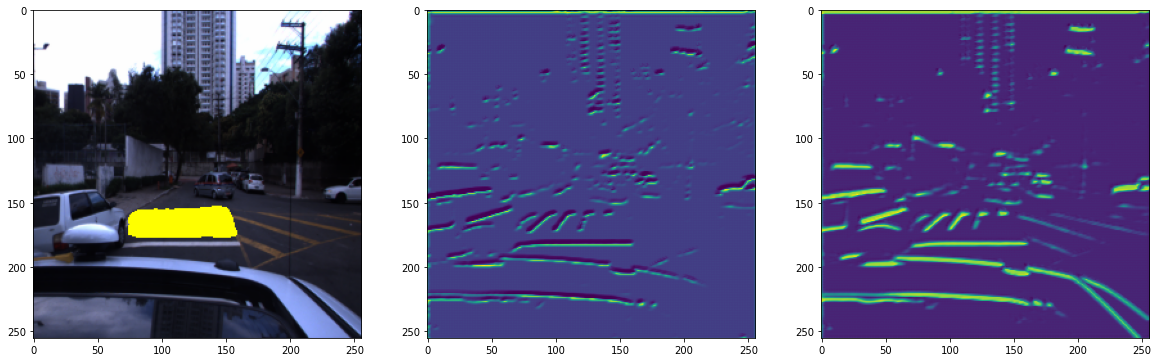

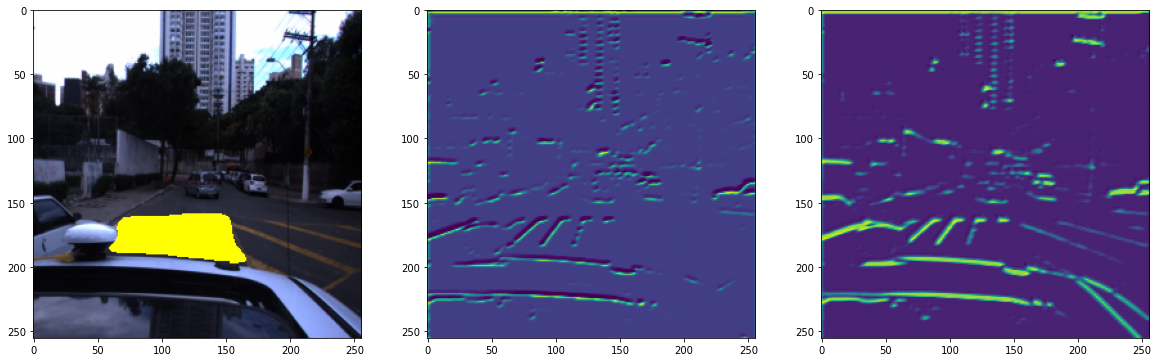

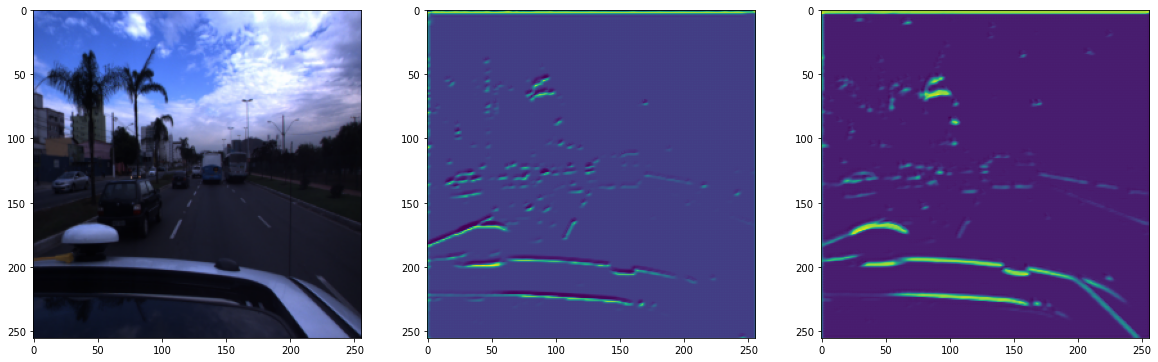

In [2]:
X = np.load('train_data_maybe/x_train.npy')[1005:1010]
Y = np.load('train_data_maybe/y_train.npy')[1005:1010]

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

def draw_mask(image, mask):
    result = np.zeros((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
    for i in range(len(mask)):
        for j in range(len(mask[0])):
            result[i][j] = [255, 255, 0] if mask[i][j] > 0.5 else image[i][j]
    return result


alien_unet.compile(optimizer='adam', loss='binary_crossentropy', metrics=[mean_iou])
alien_quantized_unet.compile(optimizer='adam', loss='binary_crossentropy', metrics=[mean_iou])
alien_quantized_unetx.compile(optimizer='adam', loss='binary_crossentropy', metrics=[mean_iou])

unet_result = alien_unet.predict(X, batch_size = 1)
quantized_unet_result = alien_quantized_unet.predict(X, batch_size=1)
quantized_unetx_result = alien_quantized_unetx.predict(X, batch_size=1)

for i in range(3):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 30))
    axes[0].imshow(draw_mask(X[i], (unet_result[i])))
    axes[1].imshow(quantized_unet_result[i])
    axes[2].imshow(quantized_unetx_result[i])

